<a href="https://colab.research.google.com/github/sudhanshudotel/Sentiment-Analysis-of-Yelp-Reviews/blob/main/Sentiment_Analysis_on_Yelp_Polarity_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis on Yelp Polarity Reviews Dataset

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

# Overview


This Jupyter notebook presents a complete workflow for performing sentiment analysis on the Yelp Polarity Reviews dataset. The content of the notebook includes:

1. **Dataset Overview**: An introduction to the Yelp Polarity Reviews dataset, detailing its source, composition, and the structure designed for binary sentiment classification.
2. **Environment Setup**: Configuration of the Google Colab environment, including the integration with Google Drive for effective data management and setup of necessary Python libraries.
3. **Data Loading and Preprocessing**: The process of loading the dataset from TensorFlow Datasets (TFDS) and the preprocessing steps undertaken to prepare it for the analysis.
4. **Model Architecture**: Explanation of the model architecture utilized, featuring TensorFlow Hub's pre-trained embeddings to process text data efficiently.
5. **Training the Model**: Details on the training process of the deep learning model, including the setup of various callbacks for optimal performance, model compilation, and hyperparameter selection.
6. **Model Evaluation and Validation**: Evaluation methods used to assess model performance on validation and test datasets, along with visualizations that interpret the results.
7. **Conclusion and Future Work**: A summary of the model's performance, insights derived from the analysis, and discussion of potential areas for future improvements or additional research.

This notebook documents each step taken in the analysis, accompanied by code blocks and outputs, showcasing the application of TensorFlow and deep learning techniques in sentiment analysis.


# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks


## Loading data

### Creating the directory for the data

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'data/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Downloading data to the directory

In [ ]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = "yelp_polarity_reviews"

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True,
                       with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /content/drive/My Drive/Colab Notebooks/data/yelp_polarity_reviews/0.2.0.incomplete9AEOIS/yelp_polar…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /content/drive/My Drive/Colab Notebooks/data/yelp_polarity_reviews/0.2.0.incomplete9AEOIS/yelp_polar…

Dataset yelp_polarity_reviews downloaded and prepared to /content/drive/My Drive/Colab Notebooks/data/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


## Getting the name of the target

In [ ]:
target = 'label'

## Getting the info

In [ ]:
# Print the splits
info.splits

{Split('train'): <SplitInfo num_examples=560000, num_shards=4>,
 Split('test'): <SplitInfo num_examples=38000, num_shards=1>}

In [ ]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['1', '2']

In [ ]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

2

## Getting the training, validation and test data

In [ ]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/data/',
                      as_supervised=True)

## Batching and prefetching the data

In [ ]:
# Set the batch size
batch_size = 27

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the testing data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [ ]:
# Get the model
model = keras.Sequential([hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
                                         trainable=False,
                                         dtype=tf.string,
                                         input_shape=[],
                                         output_shape=[50]),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48197257 (183.86 MB)
Trainable params: 6657 (26.00 KB)
Non-trainable params: 48190600 (183.83 MB)
_________________________________________________________________


## Freezing the pretrained layers

In [ ]:
model.layers[0].trainable = True

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48197257 (183.86 MB)
Trainable params: 48197257 (183.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=5)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=10 ** -3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
14519/14519 [==============================] - 490s 34ms/step - loss: 0.2086 - accuracy: 0.9141 - val_loss: 0.1916 - val_accuracy: 0.9221 - lr: 0.0010
Epoch 2/10
14519/14519 [==============================] - 276s 19ms/step - loss: 0.1535 - accuracy: 0.9394 - val_loss: 0.2015 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 3/10
14519/14519 [==============================] - 276s 19ms/step - loss: 0.1086 - accuracy: 0.9591 - val_loss: 0.2500 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 4/10
14519/14519 [==============================] - 274s 19ms/step - loss: 0.0645 - accuracy: 0.9776 - val_loss: 0.3448 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 5/10
14519/14519 [==============================] - 279s 19ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.4744 - val_accuracy: 0.9082 - lr: 0.0010
Epoch 6/10
14519/14519 [==============================] - 289s 20ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.5804 - val_accuracy: 0.9042 - lr: 0.0010


## Plotting the learning curve

### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

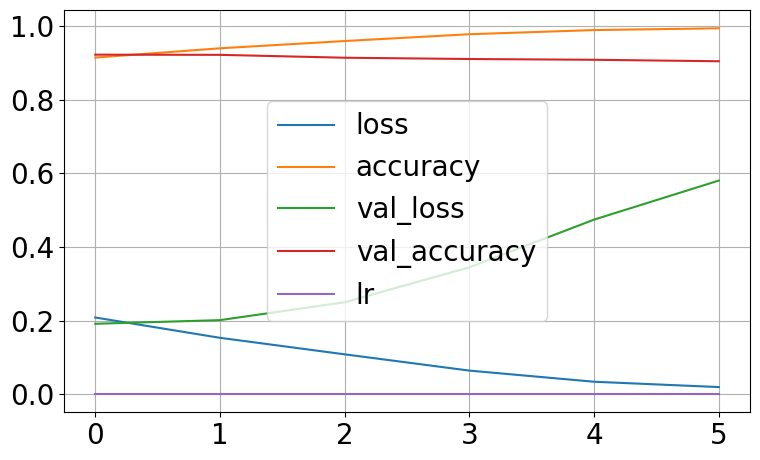

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

# Testing

## Loading the saved model

In [ ]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

## Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(data_test)

1408/1408 [==============================] - 8s 6ms/step - loss: 0.1843 - accuracy: 0.9269


# Reference
- The code for building, compiling and training RNNs were largely inspired by the following work:
    - Géron, A., 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.